In [5]:
import networkx as nx
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from operator import itemgetter
%matplotlib inline

In [6]:
G = nx.read_edgelist("/Users/cazabetremy/ownCloud/cours/BSS/airportData.edges")

## Display basic information on our graph

In [7]:
print("#nodes: ",len(G.nodes()))
print("#edges: ",len(G.edges()))
print("#avg. clustering:",nx.average_clustering(G))
print("#Global clustering coefficient:",nx.transitivity(G))

#nodes:  3618
#edges:  14142
#avg. clustering: 0.4957489312349579
#Global clustering coefficient: 0.24345387322110054


## Display the degree distribution

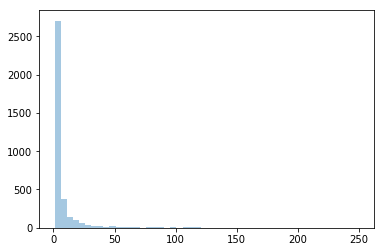

In [31]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
sns.distplot(degree_sequence, kde=False, rug=False);

## Show it is Power-Law-ish

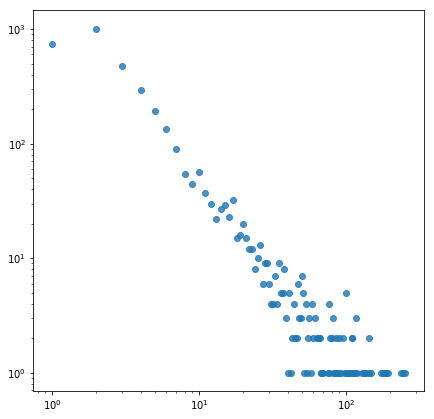

In [47]:
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
deg = np.array(list(deg))
cnt = np.array(list(cnt))
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot(deg,cnt,fit_reg=False)

In [ ]:
## Checking top nodes for some centralities

In [61]:
TopDegree = nx.degree(G)
TopDegree = sorted(TopDegree,key=itemgetter(1),reverse=True)[:5]
TopDegree

[('PAR_Paris', 250),
 ('LON_London_(GB)', 242),
 ('FRA_Frankfurt', 237),
 ('AMS_Amsterdam', 192),
 ('MOW_Moscow', 186)]

In [70]:
CL = nx.closeness_centrality(G)
CL = sorted([(n,k) for n,k in CL.items()],key=itemgetter(1),reverse=True)[:5]
CL

[('LON_London_(GB)', 0.3793790644010908),
 ('FRA_Frankfurt', 0.3727328936521022),
 ('PAR_Paris', 0.37196626902509256),
 ('NYC_New_York', 0.36911929788753955),
 ('LAX_Los_Angeles_(US)', 0.36601902448896984)]

In [71]:
BTW = nx.approximate_current_flow_betweenness_centrality(G)
BTW = sorted([(n,k) for n,k in BTW.items()],key=itemgetter(1),reverse=True)[:5]
BTW

[('STO_Stockholm', 0.0977064270940121),
 ('POM_Port_Moresby', 0.09678466939541307),
 ('BNE_Brisbane', 0.08598645896097656),
 ('LON_London_(GB)', 0.08477366915242945),
 ('NYC_New_York', 0.07814966705367178)]

In [72]:
PageRank = nx.pagerank(G)
PageRank = sorted([(n,k) for n,k in PageRank.items()],key=itemgetter(1),reverse=True)[:5]
PageRank

[('PAR_Paris', 0.006091685099332755),
 ('LON_London_(GB)', 0.005214842369222961),
 ('MOW_Moscow', 0.005073820025859378),
 ('FRA_Frankfurt', 0.004918817232278328),
 ('CHI_Chicago', 0.004019310137484229)]

In [ ]:
// Be carefull, very slow...
//Commu = nx.communicability_betweenness_centrality(G)
//Commu = sorted([(n,k) for n,k in Commu.items()],key=itemgetter(1),reverse=True)[:5]
//Commu

In [77]:
nedge = nx.edge_betweenness_centrality(G,k=100)
nedge = sorted([(n,k) for n,k in nedge.items()],key=itemgetter(1),reverse=True)[:5]
nedge

[(('SIN_Singapore', 'POM_Port_Moresby'), 0.0009882918194761576),
 (('CPH_Copenhagen', 'SFJ_Kangerlussuaq'), 0.000630684248458424),
 (('BNE_Brisbane', 'HIR_Honiara'), 0.000588025798301214),
 (('NAN_Nadi', 'SUV_Suva'), 0.0005634202058543802),
 (('NYC_New_York', 'ANC_Anchorage'), 0.0004727585236464859)]

In [8]:
smallNodes = [n for (n,v) in nx.degree(G) if v<50]
G.remove_nodes_from(smallNodes)
nedge = nx.edge_betweenness_centrality(G,k=100)
nedge = sorted([(n,k) for n,k in nedge.items()],key=itemgetter(1),reverse=True)[:5]
nedge

[(('LAX_Los_Angeles_(US)', 'CAN_Guangzhou'), 0.006049433853319695),
 (('LON_London_(GB)', 'RDU_Raleigh/Durham'), 0.005783641712707275),
 (('MNL_Manila', 'FRA_Frankfurt'), 0.0057517331542906785),
 (('FLL_Fort_Lauderdale', 'FRA_Frankfurt'), 0.005491200486339993),
 (('PHX_Phoenix', 'LON_London_(GB)'), 0.005406912262319476)]